In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
import pandas as pd
from matplotlib.collections import LineCollection

### Plotting in 2D 

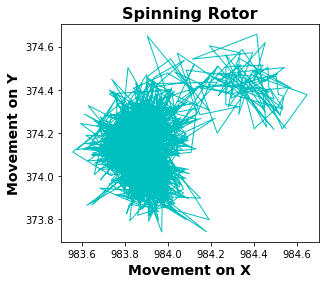

In [6]:
graph = pd.read_csv('DNAspin2.csv')
x = graph.iloc[:,0]
y = graph.iloc[:,1]





#Plotting figure, setting figure location (so we can add more in the same png if we wanted to)



fig = plt.figure()

ax = fig.add_subplot(111)

#Configure line parameters
ax.plot(x, y,'-c', linewidth = 1)



#Add Labels


ax.set_xlabel('Movement on X', fontweight = 'bold', fontsize = 14)
ax.set_ylabel('Movement on Y', fontweight = 'bold', fontsize = 14)


#Add Title
plt.title('Spinning Rotor', fontweight = 'bold', fontsize = 16)

#Set aspect ratio 
ax.set_aspect(aspect=1)

#save as .png file
#plt.savefig('Spinning_Rotor.png', dpi=300)

plt.show()

#This is all the data in a 2d projection, It is hard to see what is going on, P.K. suggests plotting a color change to indicate time

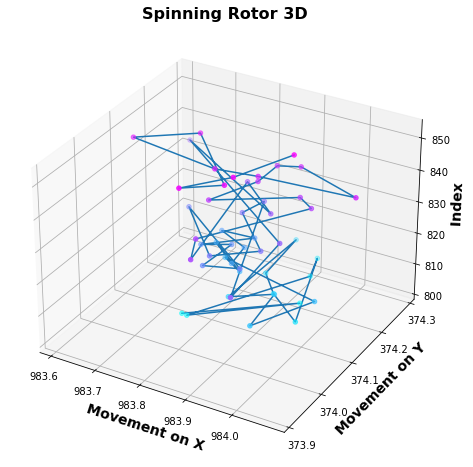

In [12]:
graph = pd.read_csv('DNAspin2.csv')

x2 = graph.iloc[800:851,0]
y2 = graph.iloc[800:851,1]
z2 = graph.iloc[800:851,2]

#notice I just chose to sample 50 data points here

#Plot figure and set size of figure
fig = plt.figure(figsize =(8,8))

#Specify 3d figure, plot, add scatter points 
#points will grdually change from cyan to magenta with change in step size 
ax2 = fig.add_subplot(111, projection= '3d')
ax2.plot3D(x2, y2, z2)
ax2.scatter3D(x2,y2,z2, c=z2, cmap='cool')

#Set x and y ticks to ensure square x-y grid
plt.xticks((983.6, 983.7, 983.8, 983.9, 984.0,))
plt.yticks((374.3, 374.2, 374.1, 374.0, 373.9)) #in future, figure out a way to code this useing the file so that it will change according to different files

#Set labels and title
ax2.set_xlabel(' Movement on X', fontweight = 'bold', fontsize = 14)
ax2.set_ylabel(' Movement on Y', fontweight = 'bold', fontsize = 14)
ax2.set_zlabel(' Index', fontweight = 'bold', fontsize = 14)
plt.title('Spinning Rotor 3D', fontweight = 'bold', fontsize = 16)


#Save figure as a .png file
#plt.savefig('Spinning_Rotor_3D_with_dots.png',dpi=300)

#show figure
plt.show()

#Perhaps stretch out the Z axis more to help with visualization


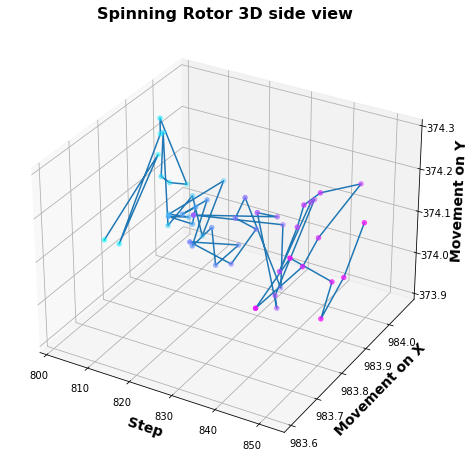

In [9]:
# Make it sideways
graph = pd.read_csv('DNAspin2.csv')

y3 = graph.iloc[800:851,0]
z3 = graph.iloc[800:851,1]
x3 = graph.iloc[800:851,2]
#notice I just chose to sample 50 data points here


# Plot figure and set size
fig = plt.figure(figsize =(8,8))

#Specify 3d figure, plot, add scatter points 
#points will grdually change from cyan to magenta with change in step size 
ax3 = fig.add_subplot(111, projection= '3d')
ax3.plot3D(x3, y3, z3)
ax3.scatter3D(x3,y3,z3, c=x3, cmap='cool')

#Set z ticks to make a square grid on the y-z plane 
ax3.set_zticks([374.3, 374.2, 374.1, 374.0, 373.9]) #format for setting ticks in 3d

#Set labels and title
ax3.set_xlabel(' Index', fontweight = 'bold', fontsize = 14)
ax3.set_ylabel(' Movement on X', fontweight = 'bold', fontsize = 14)
ax3.set_zlabel('  Movement on Y', fontweight = 'bold', fontsize = 14)
plt.title('Spinning Rotor 3D side view', fontweight = 'bold', fontsize = 16)



#save as a .png file
#plt.savefig('Spinning_Rotor_3D_with_dots.png',dpi=300)

#show figure
plt.show()

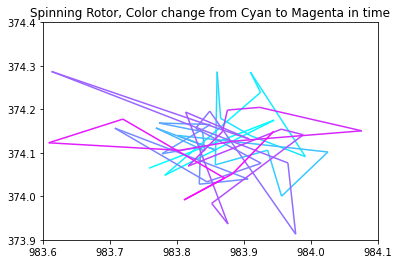

In [11]:
# code curtesy of https://stackoverflow.com/questions/10252412/matplotlib-varying-color-of-line-to-capture-natural-time-parameterization-in-da

graph = pd.read_csv('DNAspin2.csv')
#define variables
x4 = graph.iloc[800:851,0]
y4 = graph.iloc[800:851,1]
z4 = graph.iloc[800:851,2]


#I am still trying to understand this code, it basically breaks the line into segments and changes the color of each segment
# This code is needed to change the color gradient of the line from cyan to magenta for a 2D plot

t=np.linspace(0,1,x4.shape[0])


points = np.array([x4,y4]).transpose().reshape(-1,1,2)
#print(points.shape) 

segs = np.concatenate([points[:-1],points[1:]],axis=1)
#print(segs.shape)

lc = LineCollection(segs, cmap = plt.get_cmap('cool'))
lc.set_array(t)


#Plot the data with the color gradient on the line

plt.gca().add_collection(lc)

x5 = plt.xlim(x4.min(), x4.max())
y5 = plt.ylim(y4.min(), y4.max())


plt.xticks((983.6, 983.7, 983.8, 983.9, 984.0, 984.1)) #in the future, find a way to use the csv to make these ticks
plt.yticks((373.9, 374.0, 374.1, 374.2, 374.3, 374.4))

plt.title('Spinning Rotor, Color change from Cyan to Magenta in time')

plt.savefig('color_change_with_time_50values_800_to_850.png',dpi=300)

plt.show()

#need a legend to indicate how color works
#The goal is to get this plotted in 3D with seconds on the z axis (with the line having the color gradient)
#Ultimate goal would to make a movie of this plotting in time on a 3D plot